In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Leitura dos dados

In [32]:
df_original = pd.read_csv('solar-flare.csv', header = None, skiprows = 1, sep = ' ')
print("Dados")
print("Número de linhas: {}\nNúmero de colunas: {}".format(df_original.shape[0], df_original.shape[1]))

Dados
Número de linhas: 1066
Número de colunas: 13


Impressão das primeiras e últimas 10 amostras do conjunto de dados

In [33]:
df_original.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
5,C,A,O,1,2,1,1,2,1,1,0,0,0
6,B,X,O,1,3,1,1,2,1,1,0,0,0
7,C,A,O,1,3,1,1,2,1,1,0,0,0
8,C,A,O,1,2,1,1,2,1,1,1,0,0
9,B,X,O,1,3,1,1,2,1,1,0,0,0


In [34]:
df_original.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
1056,H,S,X,1,2,1,1,2,1,1,1,0,0
1057,D,S,O,1,2,1,2,2,1,1,0,0,0
1058,H,S,X,1,2,2,2,2,1,1,0,0,0
1059,H,S,X,2,2,1,1,2,1,1,0,0,0
1060,D,R,O,1,3,1,1,2,1,1,0,0,0
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


Para facilitar a manipulação dos dados, separamos a coluna composta por todos os dados em 13 colunas de nomes correspondentes a seus significados. O significado de cada valor foi retirado da fonte da base, disponível em https://archive.ics.uci.edu/ml/datasets/Solar+Flare



In [35]:
df_original = df_original.rename(
                {0: "class_code", 1: "largest_spot_size", 2: "spot_distribution",
                 3: "activity", 4: "evolution", 5: "24_flare_activity", 6: "historically_complex",
                 7: "region_become_hcomplex", 8: "area", 9: "largest_spot_area", 10: "c_class",
                 11: "m_class", 12: "x_class"}, axis='columns')

df_original.head(10)

,class_code,largest_spot_size,spot_distribution,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
5,C,A,O,1,2,1,1,2,1,1,0,0,0
6,B,X,O,1,3,1,1,2,1,1,0,0,0
7,C,A,O,1,3,1,1,2,1,1,0,0,0
8,C,A,O,1,2,1,1,2,1,1,1,0,0
9,B,X,O,1,3,1,1,2,1,1,0,0,0


# Conversão os atributos categóricos para numéricos

In [79]:
colunas_dummy=df_original.columns[:3]
df_dummies=pd.get_dummies(df_original,columns=colunas_dummy)

In [80]:
colunas_dummy

Index(['class_code', 'largest_spot_size', 'spot_distribution'], dtype='object')

In [81]:
df_dummies.head()

,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class,...,largest_spot_size_A,largest_spot_size_H,largest_spot_size_K,largest_spot_size_R,largest_spot_size_S,largest_spot_size_X,spot_distribution_C,spot_distribution_I,spot_distribution_O,spot_distribution_X
0,1,3,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [82]:
df_dummies.tail()

,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class,...,largest_spot_size_A,largest_spot_size_H,largest_spot_size_K,largest_spot_size_R,largest_spot_size_S,largest_spot_size_X,spot_distribution_C,spot_distribution_I,spot_distribution_O,spot_distribution_X
1061,1,2,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1062,2,2,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1063,1,2,1,2,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1064,1,2,1,1,2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1065,1,1,1,1,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Centering and scaling

In [83]:
y=df_dummies.iloc[:,:3]
X=df_dummies.iloc[:,3:]
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [84]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (1066, 23)
y shape: (1066, 3)


# PCA

Text(0, 0.5, 'cumulative explained variance')

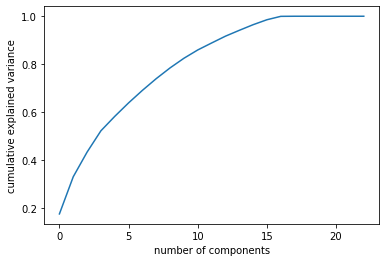

In [85]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [86]:
pca=PCA(n_components=0.9, svd_solver = 'full')
df_pca=pca.fit_transform(X)
df_pca.shape

(1066, 13)

# Validação cruzada e regressão linear

In [87]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = ShuffleSplit(n_splits=repeats,test_size=0.3)
    # create model
    model = LinearRegression()
    # evaluate model
    scores = cross_validate(model, X, y, cv=cv, scoring='neg_mean_squared_error',return_train_score=True)
    return scores

In [96]:
y_c = y.iloc[:,0]
y_m = y.iloc[:,1]
y_x = y.iloc[:,2]
scores=evaluate_model(X,y_c,5)

In [98]:
scores

{'fit_time': array([0.00158405, 0.0013535 , 0.00542951, 0.00150728, 0.00148749]),
 'score_time': array([0.0005424 , 0.00046635, 0.00061154, 0.00058126, 0.00055361]),
 'test_score': array([-0.11497923, -0.09925789, -0.10340428, -0.10777811, -0.09055316]),
 'train_score': array([-0.09275315, -0.1007344 , -0.0978354 , -0.09526712, -0.10187421])}